In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Raw Results VS_Extremum test from the last run

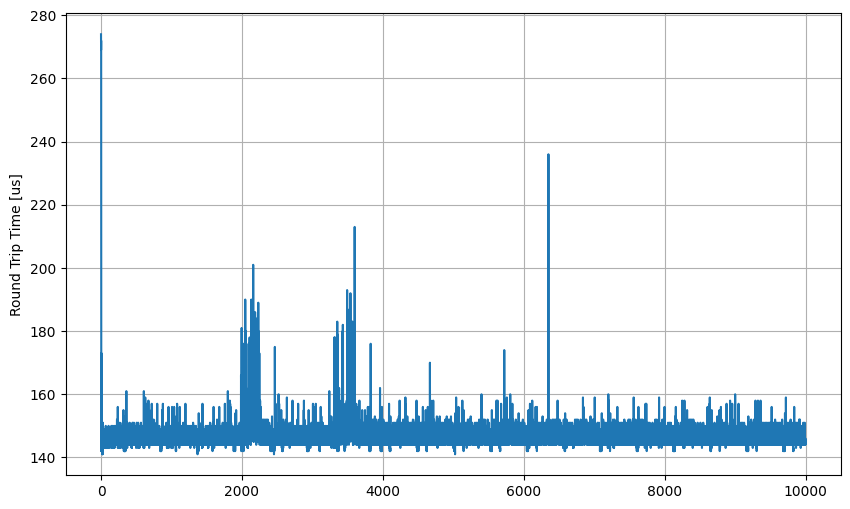

In [ ]:
# Read the cycle times from the file
file_path = '/home/dottavia/omnv_exp/vs_test_omnv/server_udp/VS_Extremum_Track/cycle_times.txt'
with open(file_path, 'r') as file:
    tmp = [float(line.strip()) for line in file if line.strip()]
# drop first two values from the file
cycle_times = tmp[2:] if len(tmp) >= 2 else []

data = [cycle_times]
labels= ['solo']

# Plot the box plots
plt.figure(figsize=(10, 6))
plt.plot(cycle_times, label='solo')
plt.ylabel('Round Trip Time [us]')
# plt.ylim(0, 1000000)  # Set y-axis range from 0 to 1,000,000
plt.grid(True)


Comparison with tcpdump results 

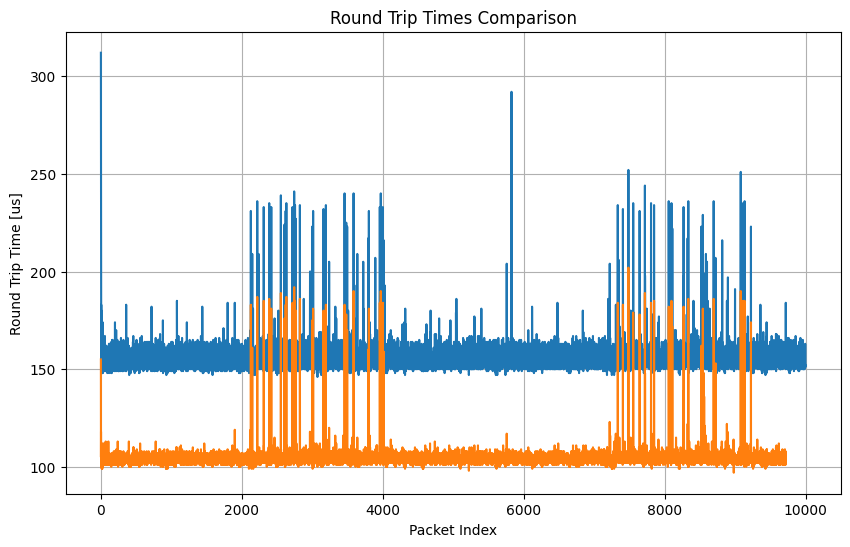

In [ ]:
def remove_outliers(data):
    q1 = np.percentile(data, 0)
    q3 = np.percentile(data, 100)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return [x for x in data if lower_bound <= x <= upper_bound]

# Read the cycle times from the file
file_path = '/home/dottavia/omnv_exp/vs_test_omnv/server_udp/VS_Extremum_Track/cycle_times.txt'
with open(file_path, 'r') as file:
    tmp = [float(line.strip()) for line in file if line.strip()]
# drop first two values from file
tmp = tmp[2:] if len(tmp) >= 2 else []
cycle_times = remove_outliers(tmp)

file_path = '/home/dottavia/omnv_exp/vs_test_omnv/server_udp/tcpdump_results/timestamps.txt'
with open(file_path, 'r') as file:
    tmp2 = [float(line.strip()) for line in file if line.strip()]
# drop first two values from file
tmp2 = tmp2[2:] if len(tmp2) >= 2 else []
cycle_times_tcpdump = remove_outliers(tmp2)

# Combine all cycle times into a single list and create corresponding labels
#data = [cycle_times_tcpdump]
#labels= ['tcpdump']
data = [cycle_times, cycle_times_tcpdump]
labels= ['solo', 'tcpdump']
#data = [cycle_times, cycle_times_solo]
#labels= ['solo', 'solo_old']
#data = [cycle_times_solo, cycle_times_membomb, cycle_times_solo_col, cycle_times_membomb_col, cycle_times_solo_bwreg, cycle_times_membomb_bwreg, cycle_times_solo_col_bwreg, cycle_times_membomb_col_bwreg]
#labels = ['solo', 'membomb' ,'solo_col', 'membomb_col', 'solo_bwreg', 'membomb_bwreg', 'solo_col_bwreg', 'membomb_col_bwreg']

# Plot the box plots
plt.figure(figsize=(10, 6))
#sns.violinplot(data=data)
#plt.xticks(ticks=range(len(labels)), labels=labels)
#plt.title('Round Trip Times [us]')
#plt.xlabel('Configuration')
#plt.ylabel('Time')
## Plot the two curves on the same graph on the x axis the time in usec and on the y axis simply the index of the packet
plt.plot(cycle_times, label='solo')
plt.plot(cycle_times_tcpdump, label='tcpdump')
plt.xlabel('Packet Index')
plt.ylabel('Round Trip Time [us]')
plt.title('Round Trip Times Comparison')


# plt.ylim(0, 1000000)  # Set y-axis range from 0 to 1,000,000
plt.grid(True)
plt.savefig('/home/dottavia/omnv_exp/vs_test_omnv/server_udp/plot.png')


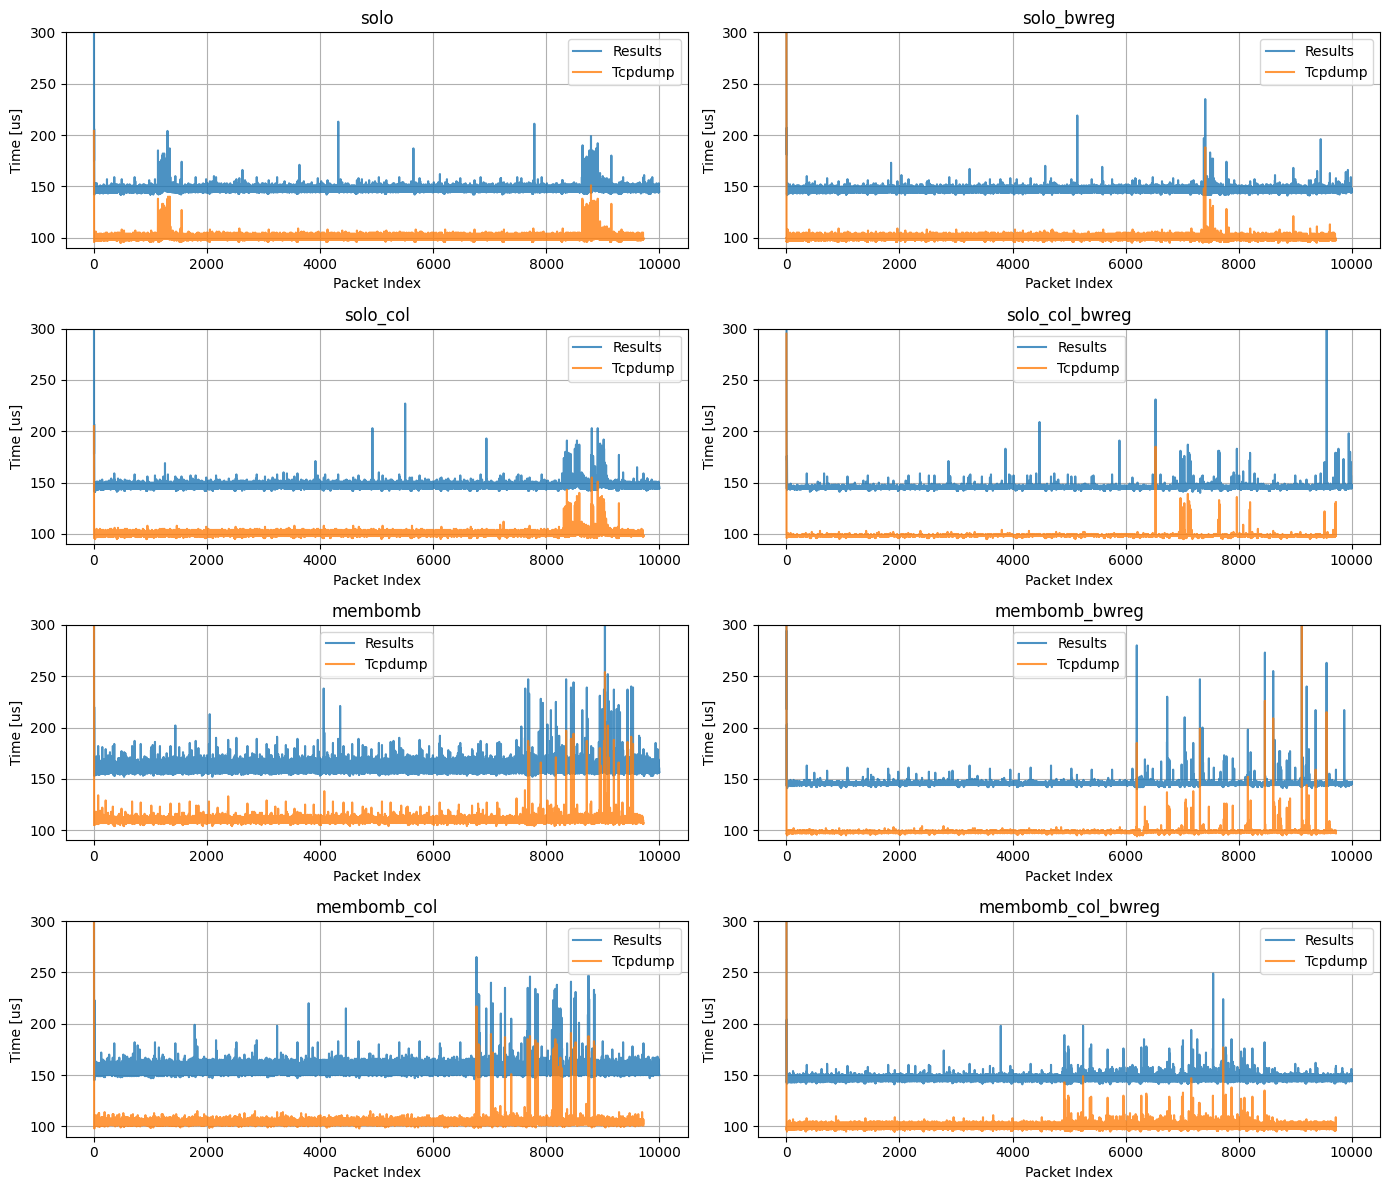

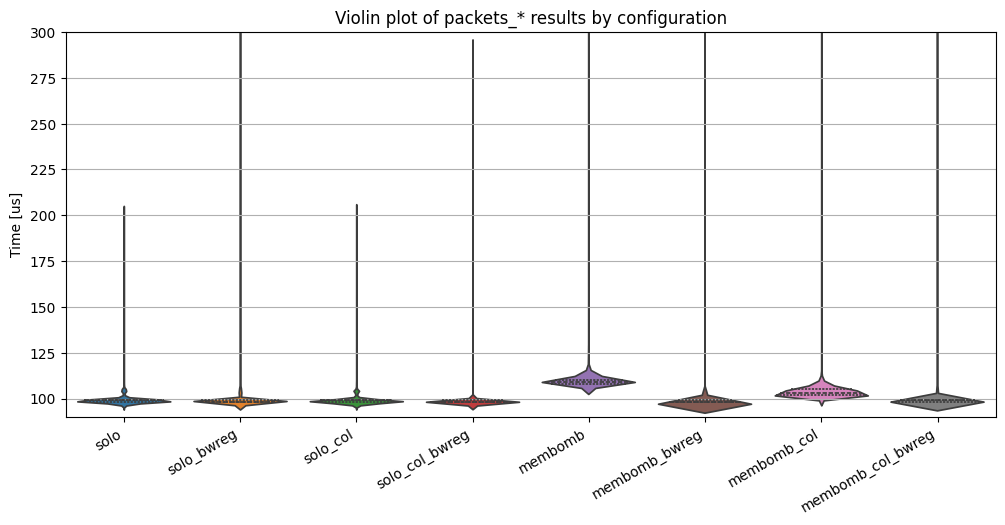

,config,source,file,count,mean,median,stdev,min,max
0,solo,Tcpdump,tcpdump_results/packets_solo_col_off_bwreg_off...,9720,99.270,99.000,3.299,95.000,204.000
1,solo_bwreg,Tcpdump,tcpdump_results/packets_solo_col_off_bwreg_on.txt,9720,98.735,98.000,3.088,95.000,322.000
2,solo_col,Tcpdump,tcpdump_results/packets_solo_col_on_bwreg_off.txt,9720,99.010,99.000,3.121,95.000,205.000
3,solo_col_bwreg,Tcpdump,tcpdump_results/packets_solo_col_on_bwreg_on.txt,9720,98.384,98.000,2.700,95.000,295.000
4,membomb,Tcpdump,tcpdump_results/packets_membomb_col_off_bwreg_...,9720,109.648,109.000,5.577,104.000,424.000
5,membomb_bwreg,Tcpdump,tcpdump_results/packets_membomb_col_off_bwreg_...,9720,98.560,98.000,6.281,94.000,573.000
6,membomb_col,Tcpdump,tcpdump_results/packets_membomb_col_on_bwreg_o...,9720,103.879,103.000,5.377,98.000,362.000
7,membomb_col_bwreg,Tcpdump,tcpdump_results/packets_membomb_col_on_bwreg_o...,9720,98.943,99.000,5.446,95.000,563.000


,config,mean_diff
0,solo,47.257
1,solo_bwreg,46.854
2,solo_col,46.975
3,solo_col_bwreg,47.153
4,membomb,50.183
5,membomb_bwreg,46.950
6,membomb_col,50.080
7,membomb_col_bwreg,46.879


In [3]:
import os
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Optional
from IPython.display import display, HTML

# In-notebook aggregation and visualization using exact filename pattern:
# cycle_times_$1_col_${CACHECOL}_bwreg_${BWREG}.txt and packets_<suffix>.txt/.pcap
BASE = '/home/dottavia/omnv_exp/vs_test_omnv/server_udp'
RESULTS_DIR = os.path.join(BASE, 'Results')
TCP_DIR = os.path.join(BASE, 'tcpdump_results')


def read_floats(path: str) -> List[float]:
    vals = []
    if not path or not os.path.isfile(path):
        return vals
    with open(path, 'r') as f:
        for line in f:
            s = line.strip()
            if not s:
                continue
            try:
                vals.append(float(s))
            except ValueError:
                continue
    return vals


def summarize(data: List[float]) -> Optional[dict]:
    if not data:
        return None
    mean = statistics.mean(data)
    median = statistics.median(data)
    stdev = statistics.pstdev(data) if len(data) > 1 else 0.0
    return {
        'count': len(data),
        'mean': mean,
        'median': median,
        'stdev': stdev,
        'min': min(data),
        'max': max(data),
    }


# Try to import scapy for in-notebook pcap processing; if unavailable, warn and skip pcap->txt generation
HAVE_SCAPY = True
try:
    from scapy.utils import RawPcapReader
    from scapy.layers.l2 import Ether
    from scapy.layers.inet import IP
except Exception as e:
    HAVE_SCAPY = False
    _scapy_err = str(e)
    print('scapy not available in this environment; .pcap processing will be skipped:', _scapy_err)


def process_pcap_to_list(pcap_path, target='192.168.1.60', max_samples=200000):
    """Return list of RTT diffs (microseconds) extracted from pcap (send-receive pairs)."""
    diffs = []
    if not HAVE_SCAPY:
        raise RuntimeError('scapy not available')
    counter = 0
    last_recv_ts = None
    for (pkt_data, pkt_metadata,) in RawPcapReader(pcap_path):
        if counter >= max_samples:
            break
        pkt_timestamp = (pkt_metadata.sec * 1_000_000) + pkt_metadata.usec
        ether_pkt = Ether(pkt_data)
        if IP not in ether_pkt:
            continue
        ip_pkt = ether_pkt[IP]
        if ip_pkt.dst == target:
            last_recv_ts = pkt_timestamp
        elif ip_pkt.src == target and last_recv_ts is not None:
            diff = pkt_timestamp - last_recv_ts
            diffs.append(diff)
            counter += 1
            last_recv_ts = None
    return diffs


# Build list of configurations (exact filename pattern uses mode, cache(on/off), bw(on/off))
modes = ['solo', 'membomb']
cache_options = ['off', 'on']
bw_options = ['off', 'on']

rows = []
mean_diffs = {}

# collect tcpdump lists for violin plot

tcp_vals_by_config = []
labels_by_config = []

# Prepare subplots: 4 rows x 2 cols (8 cases)
fig, axes = plt.subplots(4, 2, figsize=(14, 12), sharey=False)
axes = axes.flatten()
ax_idx = 0

# Plots configuration
samples = 10000  # limit samples plotted per case for visual clarity
y_min = 90
y_max = 300

for mode in modes:
    for cache in cache_options:
        for bw in bw_options:
            parts = [mode]
            if cache == 'on':
                parts.append('col')
            if bw == 'on':
                parts.append('bwreg')
            label = '_'.join(parts)
            # exact results filename per requested pattern
            suffix = f'{mode}_col_{cache}_bwreg_{bw}'
            res_fname = f'cycle_times_{suffix}.txt'
            res_path = os.path.join(RESULTS_DIR, res_fname)
            if not os.path.isfile(res_path):
                # fallback token search for backwards compatibility
                tokens = [mode] + (['col'] if cache=='on' else []) + (['bwreg'] if bw=='on' else [])
                res_path = None
                for fn in os.listdir(RESULTS_DIR):
                    lname = fn.lower()
                    if 'cycle_times' in lname and all(t in lname for t in tokens):
                        res_path = os.path.join(RESULTS_DIR, fn)
                        break
            res_vals = read_floats(res_path) if res_path else []
            res_sum = summarize(res_vals)
            rows.append({
                'config': label,
                'source': 'Results',
                'file': os.path.relpath(res_path, BASE) if res_path else None,
                'count': res_sum['count'] if res_sum else None,
                'mean': res_sum['mean'] if res_sum else None,
                'median': res_sum['median'] if res_sum else None,
                'stdev': res_sum['stdev'] if res_sum else None,
                'min': res_sum['min'] if res_sum else None,
                'max': res_sum['max'] if res_sum else None,
            })

            # tcpdump: exact packets_{suffix}.txt, then pcap, then folder timestamps, then global
            tcp_txt = os.path.join(TCP_DIR, f'packets_{suffix}.txt')
            tcp_pcap = os.path.join(TCP_DIR, f'packets_{suffix}.pcap')
            folder_ts = os.path.join(TCP_DIR, suffix, 'timestamps.txt')
            tcp_path = None
            tcp_vals = []
            if os.path.isfile(tcp_txt):
                tcp_path = tcp_txt
                tcp_vals = read_floats(tcp_path)
            elif os.path.isfile(tcp_pcap) and HAVE_SCAPY:
                try:
                    tcp_vals = process_pcap_to_list(tcp_pcap)
                    out_txt = os.path.splitext(tcp_pcap)[0] + '.txt'
                    with open(out_txt, 'w') as of:
                        for v in tcp_vals:
                            of.write(f"{v}\n")
                    tcp_path = out_txt
                except Exception as e:
                    print('Error processing pcap', tcp_pcap, e)
            elif os.path.isfile(folder_ts):
                tcp_path = folder_ts
                tcp_vals = read_floats(tcp_path)
            else:
                global_ts = os.path.join(TCP_DIR, 'timestamps.txt')
                if os.path.isfile(global_ts):
                    tcp_path = global_ts
                    tcp_vals = read_floats(global_ts)
            tcp_sum = summarize(tcp_vals)
            rows.append({
                'config': label,
                'source': 'Tcpdump',
                'file': os.path.relpath(tcp_path, BASE) if tcp_path else None,
                'count': tcp_sum['count'] if tcp_sum else None,
                'mean': tcp_sum['mean'] if tcp_sum else None,
                'median': tcp_sum['median'] if tcp_sum else None,
                'stdev': tcp_sum['stdev'] if tcp_sum else None,
                'min': tcp_sum['min'] if tcp_sum else None,
                'max': tcp_sum['max'] if tcp_sum else None,
            })

            # store tcp_vals for violin plot (even if empty)
            tcp_vals_by_config.append(tcp_vals)
            labels_by_config.append(label)

            if res_sum and tcp_sum:
                mean_diffs[label] = res_sum['mean'] - tcp_sum['mean']
            else:
                mean_diffs[label] = None

            # Plot comparison on the corresponding axis (limit samples for visual clarity)
            ax = axes[ax_idx]
            ax_idx += 1
            ax.set_title(label)
            if res_vals:
                ax.plot(res_vals[:samples], label='Results', alpha=0.8)
            if tcp_vals:
                ax.plot(tcp_vals[:samples], label='Tcpdump', alpha=0.8)
            ax.legend()
            ax.set_xlabel('Packet Index')
            ax.set_ylabel('Time [us]')
            ax.grid(True)
            # constrain y axis to the requested interval
            try:
                ax.set_ylim(y_min, y_max)
            except Exception:
                pass

# finalize plot
plt.tight_layout()
# display once and close to avoid duplicate rendering
display(HTML(f'<h3>Per-case comparison plots (first {samples} samples)</h3>'))
display(fig)
plt.close(fig)

# Violin plot of packets-only data (one violin per configuration that has tcp data)
box_data = []
box_labels = []
for lab, vals in zip(labels_by_config, tcp_vals_by_config):
    if vals:
        box_data.append(vals)
        box_labels.append(lab)

if box_data:
    box_fig, box_ax = plt.subplots(figsize=(12, 5))
    # prefer seaborn violinplot for nicer look; fallback to matplotlib's violinplot
    try:
        import seaborn as sns
        sns.violinplot(data=box_data, ax=box_ax, inner='quartile')
    except Exception:
        # fallback: matplotlib violinplot (less pretty)
        box_ax.violinplot(box_data, showmeans=False, showmedians=True)
    box_ax.set_title('Violin plot of packets_* results by configuration')
    box_ax.set_ylabel('Time [us]')
    box_ax.set_xticks(range(len(box_labels)))
    box_ax.set_xticklabels(box_labels, rotation=30, ha='right')
    box_ax.grid(True, axis='y')
    # constrain violin y axis to requested interval
    try:
        box_ax.set_ylim(90, 300)
    except Exception:
        pass
    display(HTML('<h3>Violin plot (packets_* results)</h3>'))
    display(box_fig)
    plt.close(box_fig)
else:
    print('No packets_* data found to create violin plot')

# DataFrame summary display (Tcpdump only)
df = pd.DataFrame(rows)
# filter to Tcpdump rows only
df_tcp = df[df['source'] == 'Tcpdump'].reset_index(drop=True)

pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
display(HTML('<h3>Cycle-time summaries (Tcpdump only)</h3>'))
if not df_tcp.empty:
    try:
        display(df_tcp.style.format({ 'mean': '{:.3f}', 'median': '{:.3f}', 'stdev': '{:.3f}', 'min': '{:.3f}', 'max': '{:.3f}' }))
    except Exception:
        df_tcp_disp = df_tcp.copy()
        for c in ['mean','median','stdev','min','max']:
            if c in df_tcp_disp.columns:
                df_tcp_disp[c] = df_tcp_disp[c].map(lambda x: f'{x:.3f}' if pd.notnull(x) else None)
        display(df_tcp_disp)
else:
    print('No Tcpdump summary rows found')

# Mean differences table (unchanged)
diff_rows = [{'config': k, 'mean_diff': v} for k, v in mean_diffs.items()]
df_diff = pd.DataFrame(diff_rows)
display(HTML('<h3>Mean differences (Results - Tcpdump)</h3>'))
try:
    display(df_diff.style.format({'mean_diff': '{:.3f}'}))
except Exception:
    df_diff['mean_diff'] = df_diff['mean_diff'].map(lambda x: f'{x:.3f}' if pd.notnull(x) else None)
    display(df_diff)
